In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

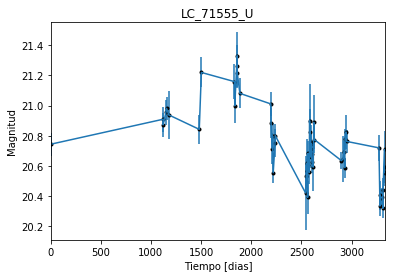

In [33]:
data = np.genfromtxt('LC_71555_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_71555_U')
plt.savefig("LC_71555_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

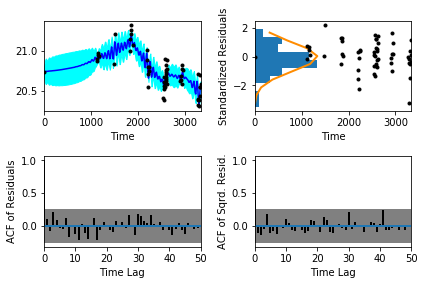

In [36]:
sample.assess_fit()


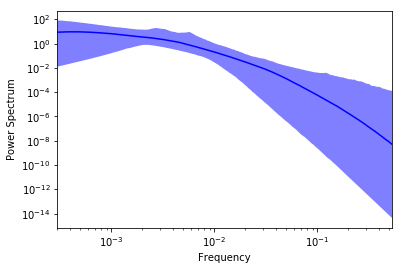

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

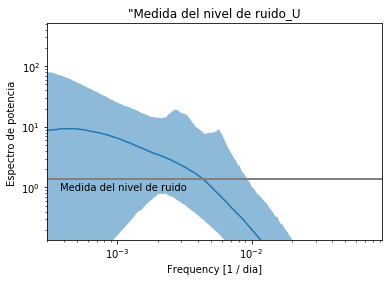

In [37]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

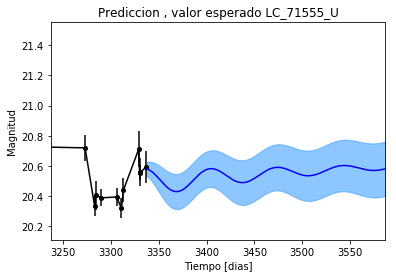

In [38]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_71555_U')


Text(0.5,1,'Prediccion, Caminos simulados  LC_71555_U')

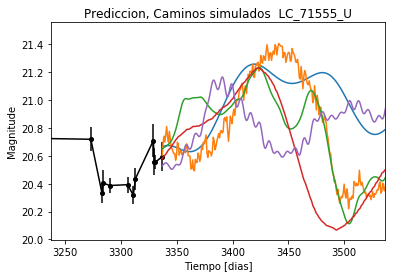

In [14]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_71555_U')


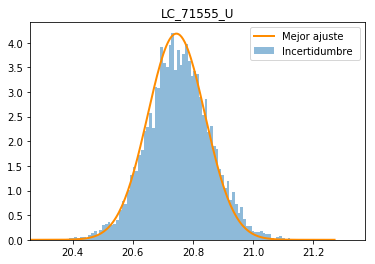

In [42]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_71555_U')
plt.savefig("Mejor_ajuste_LC_71555_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_71555_U')

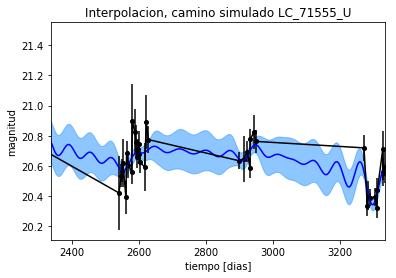

In [16]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71555_U')

Text(0.5,1,'Interpolacion, camino simulado LC_71555_U')

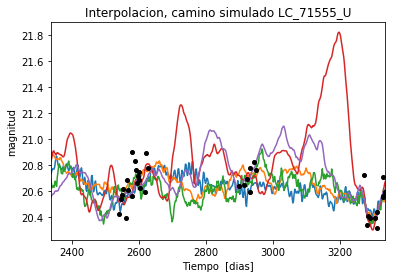

In [17]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71555_U')

In [18]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [19]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 638.795184668
Median: 0.0105182111896
Standard deviation: 0.19591227091
68% credibility interval: [ 0.0010418   0.16192009]
95% credibility interval: [  3.79147245e-04   8.01926506e-01]
99% credibility interval: [  3.11758390e-04   9.96818933e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 715.004871648
Median: 0.00395186113764
Standard deviation: 0.09917673557
68% credibility interval: [ 0.00065801  0.04944191]
95% credibility interval: [ 0.00033579  0.32180972]
99% credibility interval: [  3.04077273e-04   7.00764021e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 780.758969937
Median: 0.0412439115913
Standard dev

In [20]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1035.61895032
Median: 58.5346880785
Standard deviation: 1.71342446506
68% credibility interval: [ 56.65174002  59.73409725]
95% credibility interval: [ 54.02321564  60.8055606 ]
99% credibility interval: [ 52.05825492  61.37655685]


In [21]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 393.814041214
Median: 0.886289248456
Standard deviation: 2.25110100541
68% credibility interval: [ 0.11011524  4.15684746]
95% credibility interval: [ 0.02187334  7.74975487]
99% credibility interval: [  0.01340353  10.60646577]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 846.823213316
Median: 0.665044645566
Standard deviation: 10.5051228552
68% credibility interval: [  0.02759696  11.20247875]
95% credibility interval: [  3.1627208

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2703.08211419
Median: 4.46538155933e-13
Standard deviation: 1.89151082558e+145
68% credibility interval: [  1.11425688e-53   3.72711440e+54]
95% credibility interval: [  3.94829939e-167   3.07402720e+135]
99% credibility interval: [  2.34020168e-177   3.87897887e+143]


In [23]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2042.36994999
Median: 20.8117859993
Standard deviation: 0.0993507874538
68% credibility interval: [ 20.72838051  20.89636764]
95% credibility interval: [ 20.60176876  21.00827056]
99% credibility interval: [ 20.49313487  21.12875091]


In [24]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 521.834388926
Median: 0.0211175774746
Standard deviation: 0.272916108652
68% credibility interval: [ 0.          0.42523757]
95% credibility interval: [ 0.          0.95333563]
99% credibility interval: [ 0.          1.03627768]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 521.834388926
Median: 0.0211175774746
Standard deviation: 0.272916108652
68% credibility interval: [ 0.          0.42523757]
95% credibility interval: [ 0.          0.95333563]
99% credibility interval: [ 0.          1.03627768]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 400.460813666
Median: 0.0
Standard deviation: 0.00163036217633
68% cre

In [25]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1035.61895032
Median: 58.5346880785
Standard deviation: 1.71342446506
68% credibility interval: [ 56.65174002  59.73409725]
95% credibility interval: [ 54.02321564  60.8055606 ]
99% credibility interval: [ 52.05825492  61.37655685]


In [26]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1493.45158071
Median: 0.0591288185966
Standard deviation: 0.0510434577482
68% credibility interval: [ 0.0374864   0.10089694]
95% credibility interval: [ 0.02645237  0.18334095]
99% credibility interval: [ 0.02187068  0.28024733]


In [27]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1300.08754696
Median: 0.979908337446
Standard deviation: 0.170114580576
68% credibility interval: [ 0.83396924  1.15588151]
95% credibility interval: [ 0.71336503  1.38084925]
99% credibility interval: [ 0.64562042  1.5517931 ]


In [28]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 915.545245127
Median: 0.000393005065056
Standard deviation: 0.313196824241
68% credibility interval: [  6.75291050e-58   4.84172688e-02]
95% credibility interval: [  5.14550595e-139   6.04853748e-001]
99% credibility interval: [  1.44031727e-146   2.29138304e+000]


In [29]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 638.795184668
Median: (-0.0660878700042-0.0318748644932j)
Standard deviation: 2.11085871315
68% credibility interval: [-1.01737392 -4.17501186e+00j -0.00654585 -2.09530636e-03j]
95% credibility interval: [ -5.03865284e+00+0.j          -2.38225240e-03-0.00192517j]
99% credibility interval: [ -6.26319807e+00+0.j          -1.95883574e-03-0.02148743j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 715.004871648
Median: (-0.024830275836+0.0224150344965j)
Standard deviation: 1.82449709922
68% credibility interval: [-0.31065271+1.22679554j -0.00413441+0.07400984j]
95% credibility interval: [-2.02199013+1.56635936j -0.00210985+1.60408053j]
99% credibility interval: [ -4.40303020e+00+2.63818357j  -1.91057385e-03+0.j        ]
P